<center><h1> TD N°2 : SVM non linéaire</h1></center>


## Import package

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Modélisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot


## Function

In [3]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [6]:
#Load dataset breast cancer
data = load_breast_cancer()

In [7]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Charger le jeu de données
data = load_breast_cancer()

# Convertir en DataFrame pour une meilleure manipulation
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Aperçu des données
print(X.head())
print(y.value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

In [8]:
# Statistiques descriptives
print(X.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

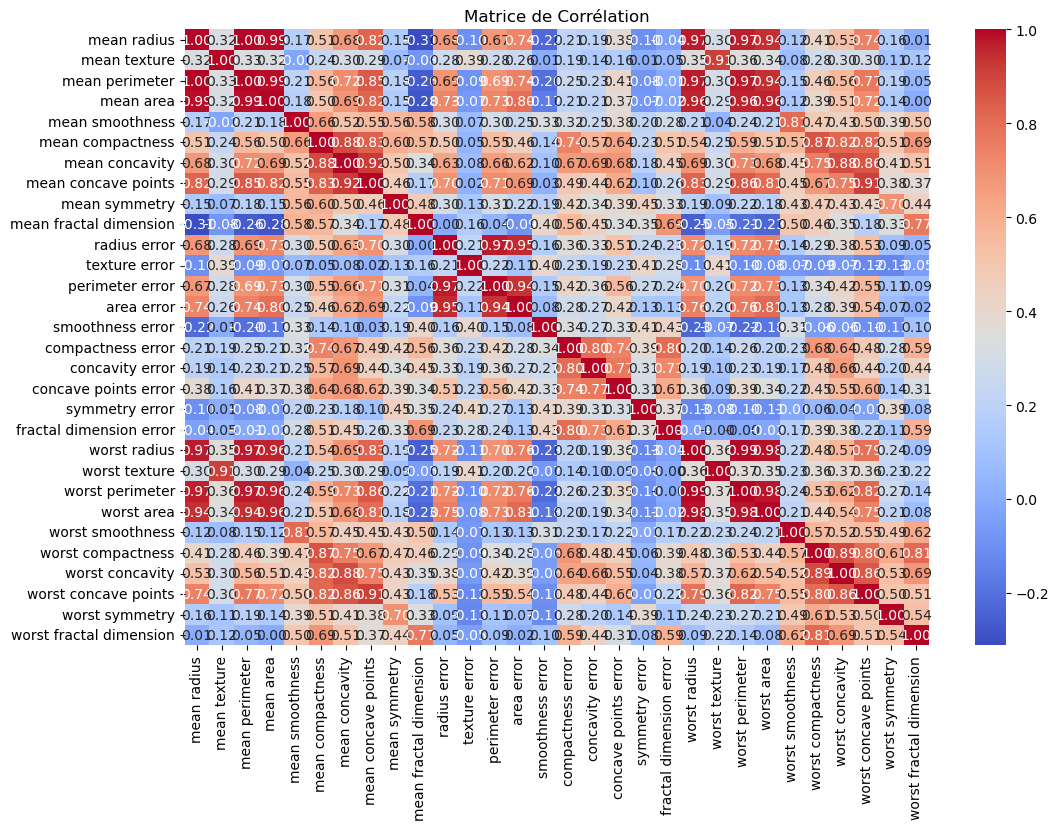

In [9]:
# Matrice de corrélation
correlation_matrix = X.corr()

# Affichage de la matrice de corrélation avec un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de Corrélation")
plt.show()


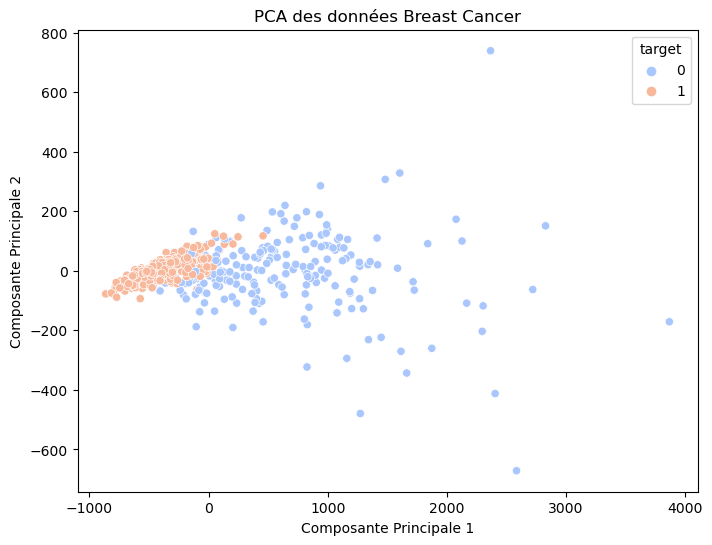

In [10]:
from sklearn.decomposition import PCA

# Appliquer PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisation des résultats PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm")
plt.title("PCA des données Breast Cancer")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()


In [11]:
from sklearn.feature_selection import SelectKBest, chi2

# Sélection des meilleures caractéristiques en fonction de leur score chi2
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# Affichage des caractéristiques sélectionnées
selected_features = X.columns[selector.get_support()]
print("Caractéristiques sélectionnées:", selected_features)


Caractéristiques sélectionnées: Index(['mean perimeter', 'mean area', 'area error', 'worst perimeter',
       'worst area'],
      dtype='object')


#### 3) Recoder les variables si nécessaire


#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

In [12]:
# Calculer la matrice de corrélation
correlation_matrix = X.corr()

# Identifier les paires fortement corrélées
high_corr_var = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            high_corr_var.add(colname)

# Afficher les variables fortement corrélées
print("Variables fortement corrélées:", high_corr_var)


Variables fortement corrélées: {'worst radius', 'worst perimeter', 'mean area', 'area error', 'worst area', 'mean perimeter', 'worst texture', 'perimeter error', 'worst concave points', 'mean concave points'}


In [13]:
# Calcul de la variance de chaque caractéristique
variances = X.var()

# Seuil de variance (par exemple, éliminer les variables avec une variance < 0.1)
low_variance_features = variances[variances < 0.1].index
print("Variables avec faible variance:", low_variance_features)


Variables avec faible variance: Index(['mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'smoothness error', 'compactness error',
       'concavity error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')


In [14]:
# Moyenne des caractéristiques pour chaque classe cible (bénin = 0, malin = 1)
mean_per_class = X.groupby(y).mean()

# Afficher les moyennes pour chaque classe
print(mean_per_class)


        mean radius  mean texture  mean perimeter   mean area  \
target                                                          
0         17.462830     21.604906      115.365377  978.376415   
1         12.146524     17.914762       78.075406  462.790196   

        mean smoothness  mean compactness  mean concavity  \
target                                                      
0              0.102898          0.145188        0.160775   
1              0.092478          0.080085        0.046058   

        mean concave points  mean symmetry  mean fractal dimension  ...  \
target                                                              ...   
0                  0.087990       0.192909                0.062680  ...   
1                  0.025717       0.174186                0.062867  ...   

        worst radius  worst texture  worst perimeter   worst area  \
target                                                              
0          21.134811      29.318208       141.370330  1

In [15]:
# Supposons que nous éliminons les variables fortement corrélées et celles à faible variance
selected_features = X.columns.difference(high_corr_var).difference(low_variance_features)

print("Caractéristiques sélectionnées après la première étape de sélection :", selected_features)


Caractéristiques sélectionnées après la première étape de sélection : Index(['mean radius', 'mean texture', 'texture error'], dtype='object')


## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [16]:
# Importer les modèles depuis sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

# Initialiser les modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'SGD Classifier': SGDClassifier()
}

# Entraîner et évaluer chaque modèle
for model_name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Évaluer les performances
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n")


--- Logistic Regression ---
Accuracy: 0.9006
Confusion Matrix:
[[ 51  12]
 [  5 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        63
           1       0.90      0.95      0.92       108

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



--- Support Vector Classifier ---
Accuracy: 0.9123
Confusion Matrix:
[[ 52  11]
 [  4 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87        63
           1       0.90      0.96      0.93       108

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



--- SGD Classifier ---
Accuracy: 0.8889
Confusion Matrix:
[[ 44  19]
 [  0 108]]
Classification Report:
              

#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

In [21]:
# Sélectionner deux caractéristiques
X_selected = X[['mean radius', 'mean texture']]


In [ ]:
#plt.scatter(<col_1>, <col_2>, c=<target>)
#plot_predictions(clf, axes)
#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Fonction pour afficher la fonction de décision
def plot_predictions(clf, X, y, axes):
    # Générer une grille de points pour le graphique
    x_min, x_max, y_min, y_max = axes
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Tracer les contours
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    
    # Tracer les points de données
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.legend(*scatter.legend_elements(), loc="lower right")
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.title('SVC Decision Function with Kernel')
    plt.show()

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


Kernel: linear, C: 0.1, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


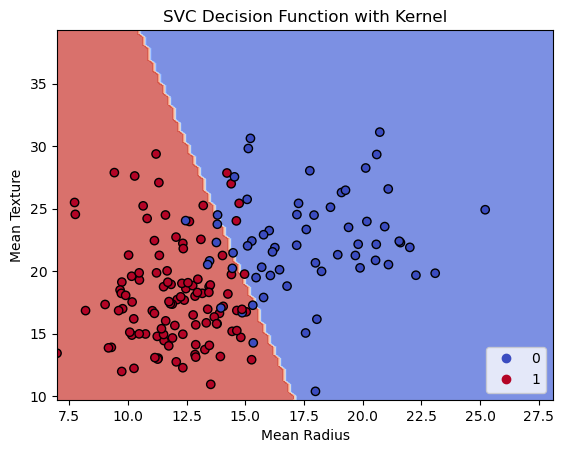

Kernel: linear, C: 0.1, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


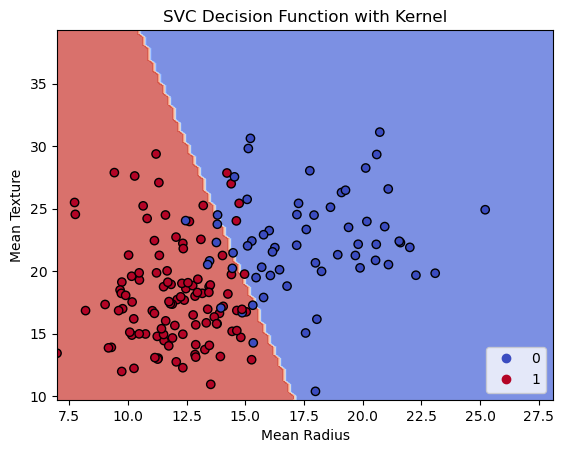

Kernel: linear, C: 1, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


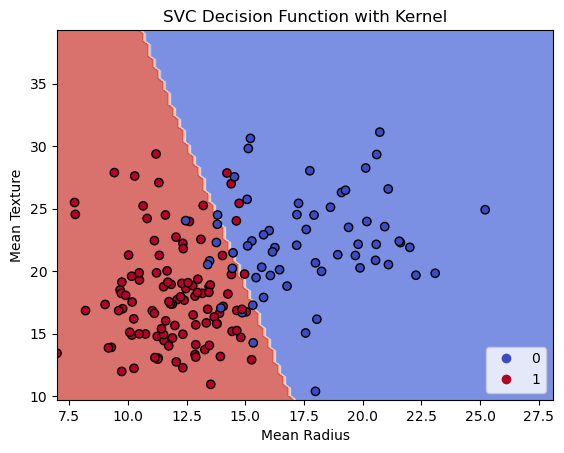

Kernel: linear, C: 1, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


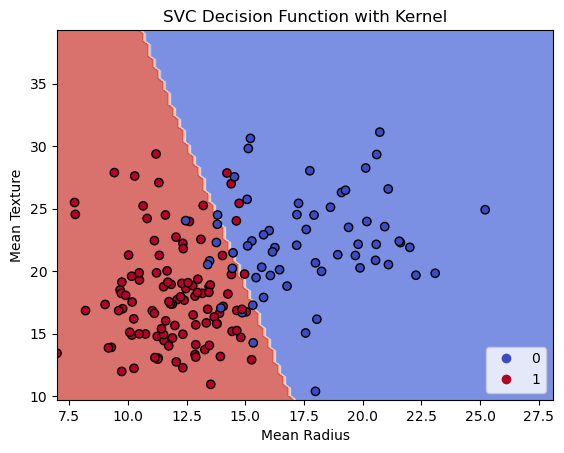

Kernel: linear, C: 10, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


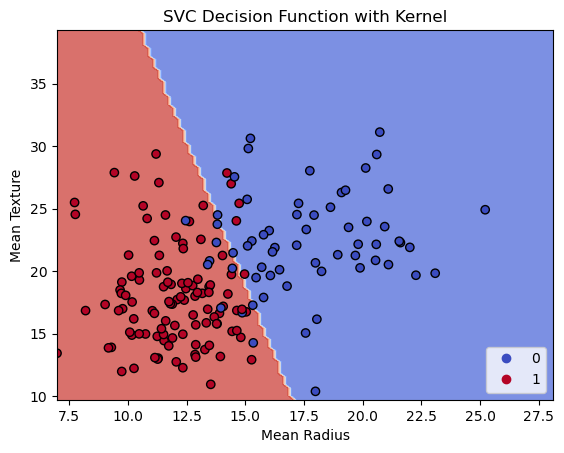

Kernel: linear, C: 10, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


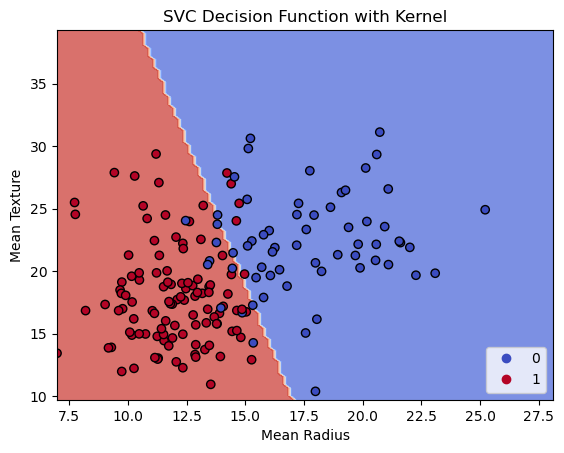

Kernel: poly, C: 0.1, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


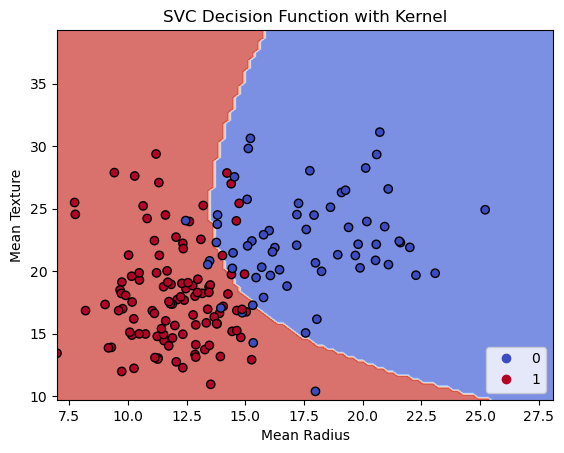

Kernel: poly, C: 0.1, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


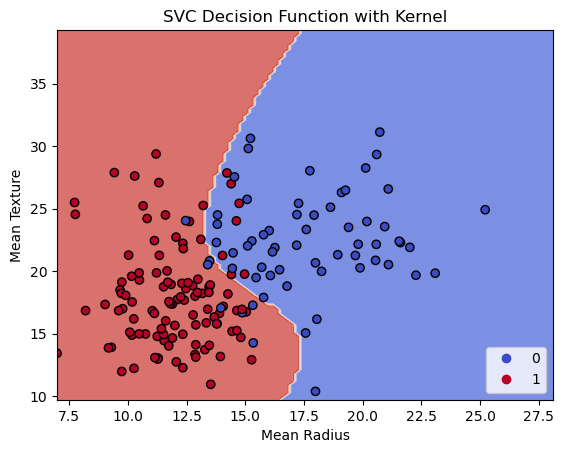

Kernel: poly, C: 1, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


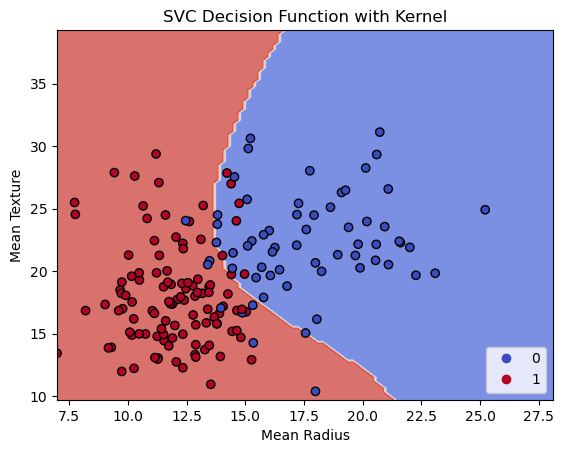

Kernel: poly, C: 1, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


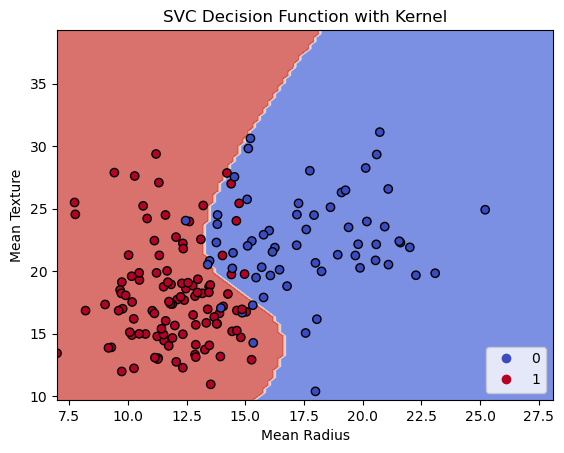

Kernel: poly, C: 10, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


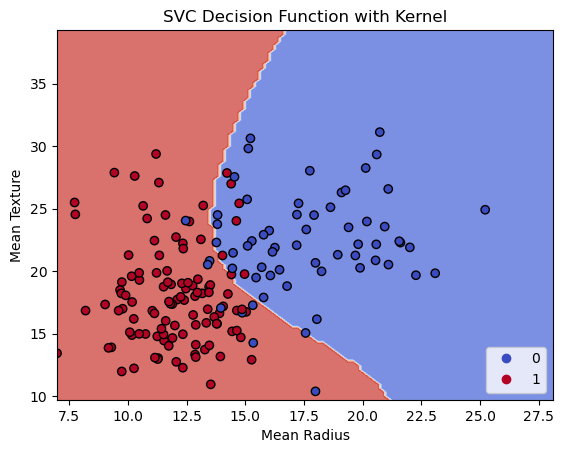

Kernel: poly, C: 10, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


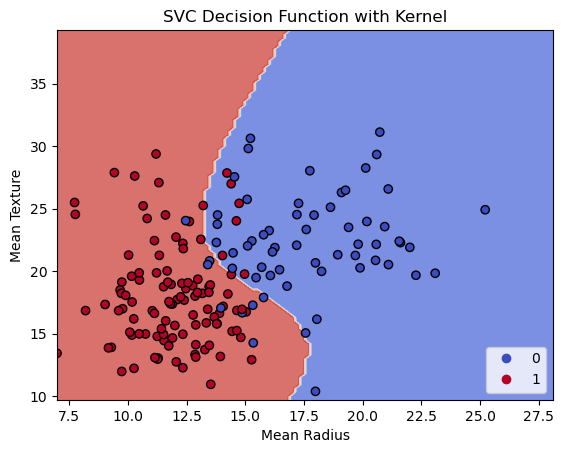

Kernel: rbf, C: 0.1, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


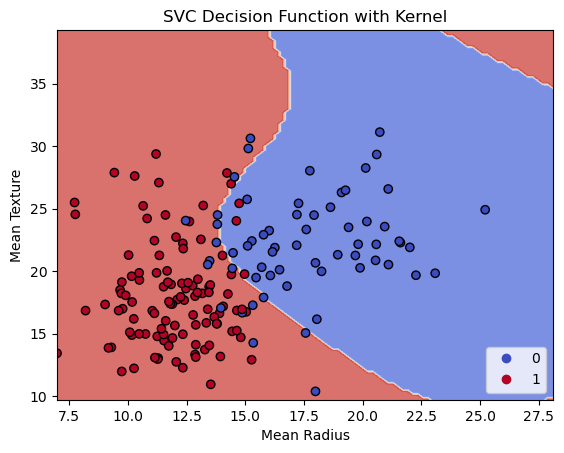

Kernel: rbf, C: 0.1, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


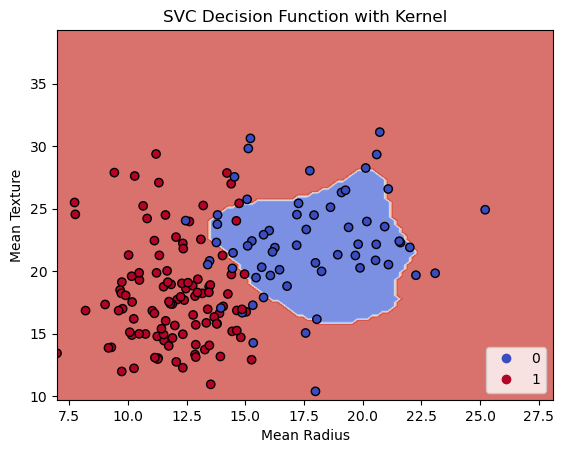

Kernel: rbf, C: 1, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


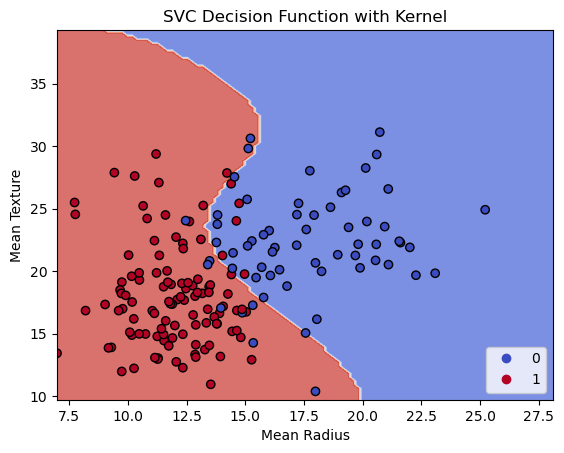

Kernel: rbf, C: 1, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


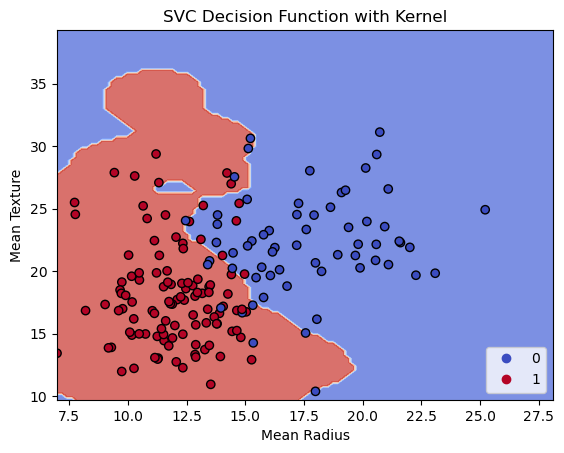

Kernel: rbf, C: 10, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


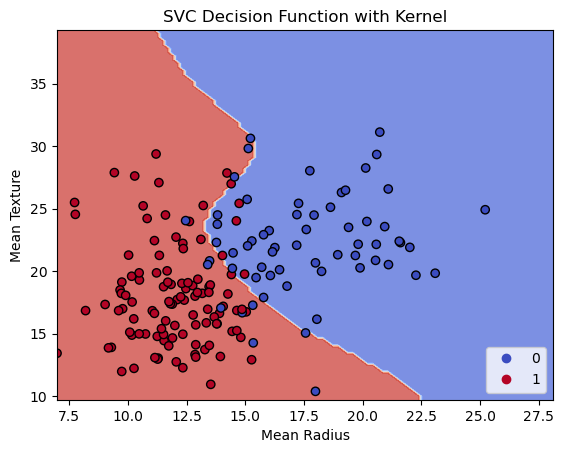

Kernel: rbf, C: 10, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


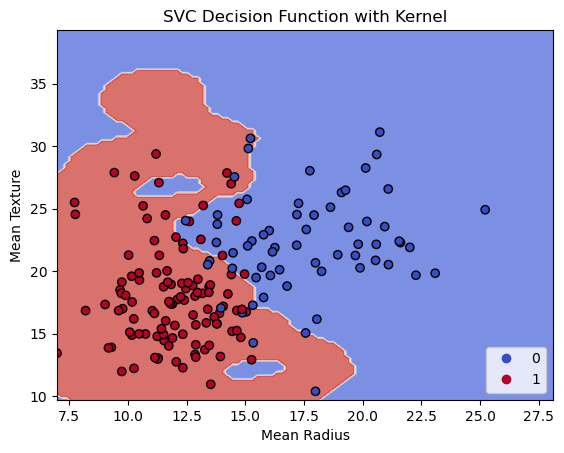

Kernel: sigmoid, C: 0.1, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


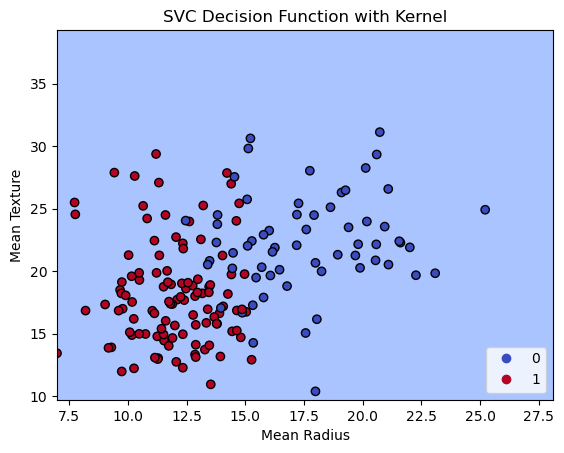

Kernel: sigmoid, C: 0.1, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


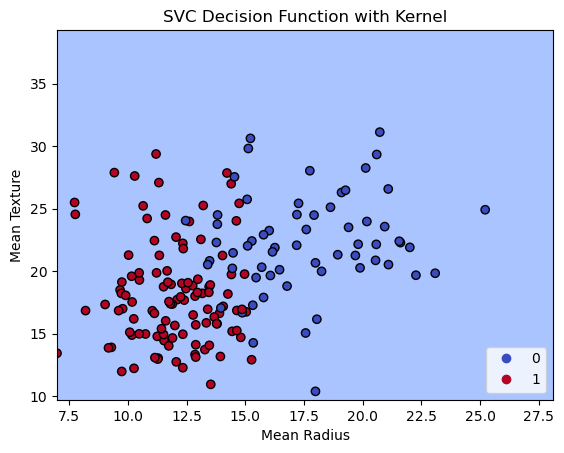

Kernel: sigmoid, C: 1, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


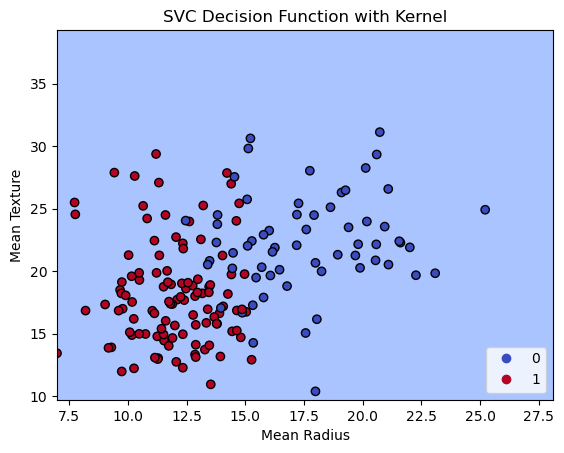

Kernel: sigmoid, C: 1, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


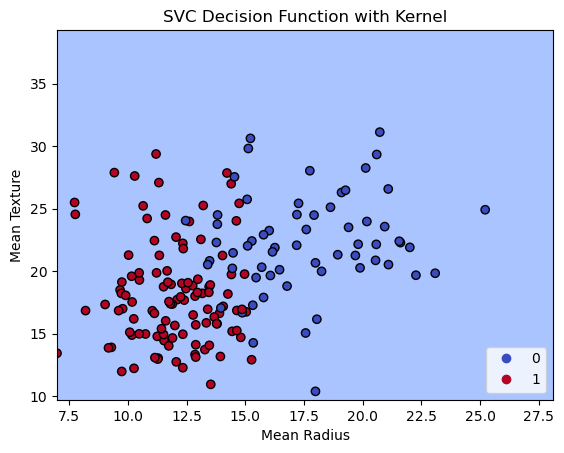

Kernel: sigmoid, C: 10, Gamma: scale


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


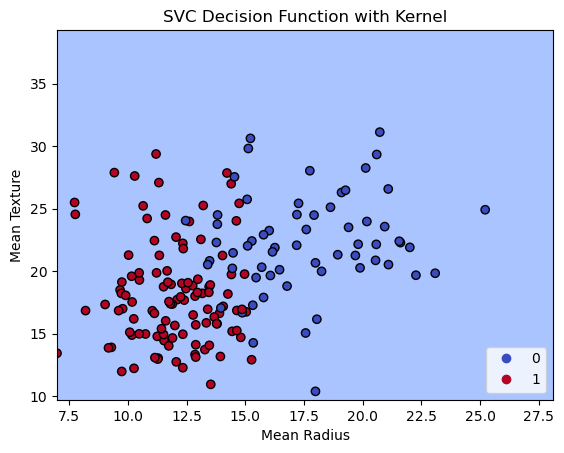

Kernel: sigmoid, C: 10, Gamma: auto


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


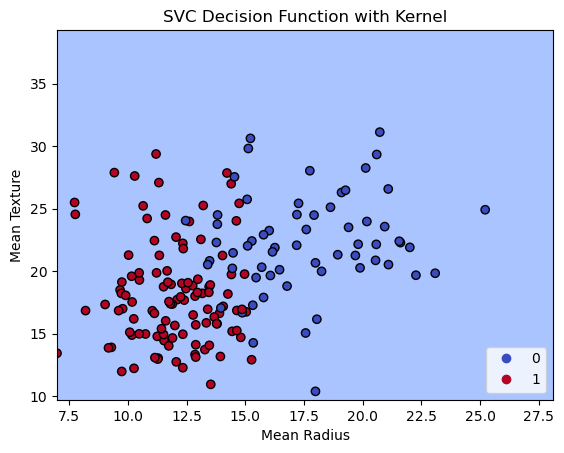

In [23]:
# Varier les noyaux et hyperparamètres
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']

for kernel in kernels:
    for C in C_values:
        for gamma in gamma_values:
            print(f"Kernel: {kernel}, C: {C}, Gamma: {gamma}")
            
            # Initialiser le modèle SVC avec les paramètres donnés
            clf = SVC(kernel=kernel, C=C, gamma=gamma)
            
            # Entraîner le modèle
            clf.fit(X_train, y_train)
            
            # Tracer la fonction de décision
            plot_predictions(clf, X_test, y_test, axes=[X_selected.iloc[:, 0].min(), X_selected.iloc[:, 0].max(), 
                                                         X_selected.iloc[:, 1].min(), X_selected.iloc[:, 1].max()])


#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

In [29]:
# Sélectionner un ensemble de caractéristiques (par exemple toutes les caractéristiques sauf l'étiquette)
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness']  # Exemple
X_selected = X[selected_features]


In [30]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialiser les modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier()
}

# Ajouter SVC avec différents noyaux
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    models[f'SVC ({kernel})'] = SVC(kernel=kernel)

# Entraîner et évaluer chaque modèle
for model_name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Évaluer les performances
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n")


--- Logistic Regression ---
Accuracy: 0.9181
Confusion Matrix:
[[ 54   9]
 [  5 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        63
           1       0.92      0.95      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



--- SGD Classifier ---
Accuracy: 0.5789
Confusion Matrix:
[[63  0]
 [72 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        63
           1       1.00      0.33      0.50       108

    accuracy                           0.58       171
   macro avg       0.73      0.67      0.57       171
weighted avg       0.80      0.58      0.55       171



--- SVC (linear) ---
Accuracy: 0.9181
Confusion Matrix:
[[ 53  10]
 [  4 104]]
Classification Report:
              precision    reca

Evaluating SVC with linear kernel:


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


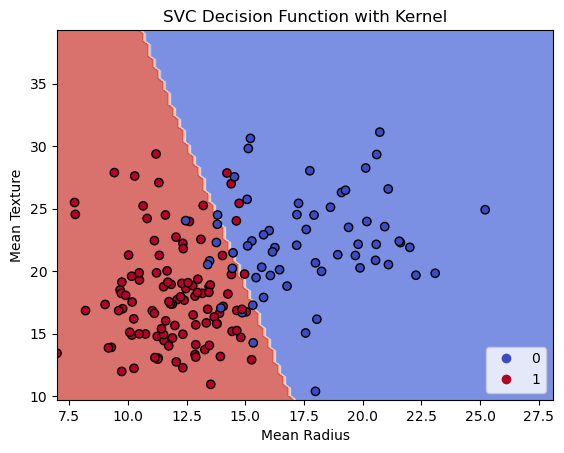

Evaluating SVC with poly kernel:


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


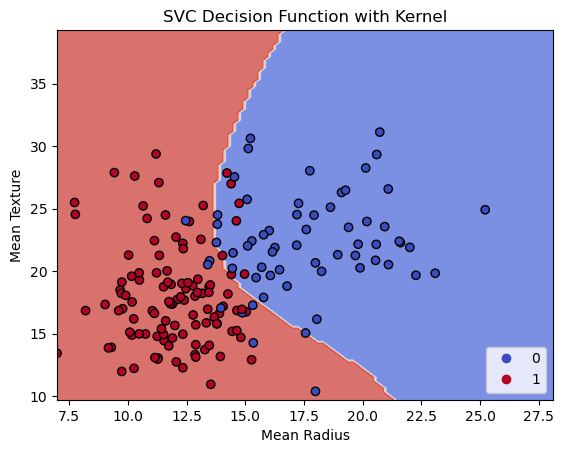

Evaluating SVC with rbf kernel:


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


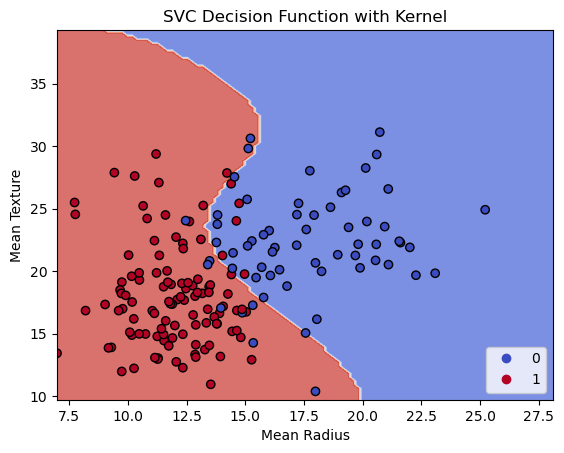

Evaluating SVC with sigmoid kernel:


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


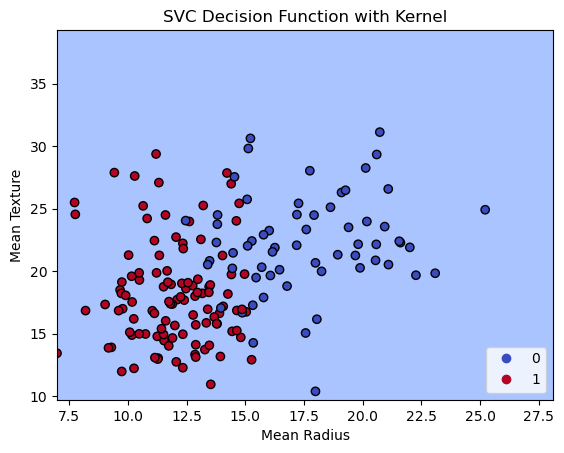

In [36]:
# Sélectionner les deux premières caractéristiques
X_selected_2 = X[['mean radius', 'mean texture']]  # Par exemple
X_train, X_test, y_train, y_test = train_test_split(X_selected_2, y, test_size=0.3, random_state=42)

# Entraîner un modèle avec les deux caractéristiques
for kernel in kernels:
    print(f"Evaluating SVC with {kernel} kernel:")
    
    # Initialiser le modèle SVC avec le noyau donné
    clf = SVC(kernel=kernel)
    
    # Entraîner le modèle
    clf.fit(X_train, y_train)
    
    # Tracer la fonction de décision avec les axes ajustés pour 2 caractéristiques
    plot_predictions(clf, X_test, y_test, axes=[X_selected_2.iloc[:, 0].min(), X_selected_2.iloc[:, 0].max(), 
                                                 X_selected_2.iloc[:, 1].min(), X_selected_2.iloc[:, 1].max()])


#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

In [37]:
from sklearn.model_selection import cross_val_score

# Sélectionner l'ensemble de caractéristiques
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness']
X_selected = X[selected_features]

# Initialiser les modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    'SVC (linear)': SVC(kernel='linear'),
    'SVC (poly)': SVC(kernel='poly'),
    'SVC (rbf)': SVC(kernel='rbf'),
    'SVC (sigmoid)': SVC(kernel='sigmoid')
}

# Effectuer la validation croisée
for model_name, model in models.items():
    # Calculer la validation croisée
    scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')  # 5 plis, scoring par accuracy
    
    # Afficher les résultats
    print(f"--- {model_name} ---")
    print(f"Cross-validated accuracy scores: {scores}")
    print(f"Mean accuracy: {scores.mean():.4f}")
    print(f"Standard deviation: {scores.std():.4f}")
    print("\n")


--- Logistic Regression ---
Cross-validated accuracy scores: [0.85087719 0.88596491 0.88596491 0.92982456 0.89380531]
Mean accuracy: 0.8893
Standard deviation: 0.0251


--- SGD Classifier ---
Cross-validated accuracy scores: [0.84210526 0.81578947 0.85087719 0.81578947 0.77876106]
Mean accuracy: 0.8207
Standard deviation: 0.0252


--- SVC (linear) ---
Cross-validated accuracy scores: [0.85087719 0.88596491 0.9122807  0.92982456 0.89380531]
Mean accuracy: 0.8946
Standard deviation: 0.0266


--- SVC (poly) ---
Cross-validated accuracy scores: [0.84210526 0.87719298 0.89473684 0.92982456 0.92035398]
Mean accuracy: 0.8928
Standard deviation: 0.0315


--- SVC (rbf) ---
Cross-validated accuracy scores: [0.83333333 0.87719298 0.90350877 0.92105263 0.92920354]
Mean accuracy: 0.8929
Standard deviation: 0.0347


--- SVC (sigmoid) ---
Cross-validated accuracy scores: [0.3245614  0.33333333 0.28947368 0.42105263 0.4159292 ]
Mean accuracy: 0.3569
Standard deviation: 0.0524




#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)

In [ ]:
Les modèles les plus prometteurs sont :

SVC avec noyau linéaire et Logistic Regression, qui offrent les meilleures précisions moyennes.
SVC avec noyau polynomiale et RBF sont également de bons candidats, mais montrent un peu plus de variabilité, ce qui peut indiquer qu'ils sont moins stables.
Le modèle SVC avec noyau sigmoïde n'est clairement pas adapté pour ce jeu de données. Vous pourriez envisager d'explorer d'autres noyaux pour les SVM ou de réévaluer l'échelle des caractéristiques si ce modèle doit être retenu.

En fonction des objectifs et des ressources disponibles, il serait judicieux de tester davantage ces modèles avec des jeux de données différents ou de tuner les hyperparamètres pour améliorer les performances.

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Sélectionner l'ensemble de caractéristiques
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness']
X_selected = X[selected_features]

# Définir les modèles et les grilles de paramètres
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100]  # Pénalité pour la régression logistique
}

param_grid_svc_linear = {
    'C': [0.01, 0.1, 1, 10, 100]  # Pénalité pour SVC avec noyau linéaire
}

param_grid_svc_rbf = {
    'C': [0.01, 0.1, 1, 10, 100],  # Pénalité pour SVC avec noyau RBF
    'gamma': [0.01, 0.1, 1, 10, 100]  # Paramètre gamma pour RBF
}

# Initialiser les modèles
logreg = LogisticRegression(max_iter=10000)
svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')

# Appliquer GridSearchCV pour la régression logistique
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_selected, y)

# Appliquer GridSearchCV pour SVC avec noyau linéaire
grid_svc_linear = GridSearchCV(svc_linear, param_grid_svc_linear, cv=5, scoring='accuracy')
grid_svc_linear.fit(X_selected, y)

# Appliquer GridSearchCV pour SVC avec noyau RBF
grid_svc_rbf = GridSearchCV(svc_rbf, param_grid_svc_rbf, cv=5, scoring='accuracy')
grid_svc_rbf.fit(X_selected, y)

# Afficher les meilleurs résultats pour chaque modèle
print(f"--- Logistic Regression ---")
print(f"Best parameters: {grid_logreg.best_params_}")
print(f"Best cross-validation score: {grid_logreg.best_score_:.4f}")
print("\n")

print(f"--- SVC (linear) ---")
print(f"Best parameters: {grid_svc_linear.best_params_}")
print(f"Best cross-validation score: {grid_svc_linear.best_score_:.4f}")
print("\n")

print(f"--- SVC (rbf) ---")
print(f"Best parameters: {grid_svc_rbf.best_params_}")
print(f"Best cross-validation score: {grid_svc_rbf.best_score_:.4f}")
print("\n")

# Sélectionner le meilleur modèle (par exemple, SVC avec noyau linéaire ici)
best_model = grid_svc_linear.best_estimator_

# Faire des prédictions avec le meilleur modèle
y_pred = best_model.predict(X_selected)

# Afficher le rapport de classification pour le meilleur modèle
print("--- Best Model Predictions ---")
print(classification_report(y, y_pred))


--- Logistic Regression ---
Best parameters: {'C': 100}
Best cross-validation score: 0.9156


--- SVC (linear) ---
Best parameters: {'C': 100}
Best cross-validation score: 0.9192


--- SVC (rbf) ---
Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.9051


--- Best Model Predictions ---
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       212
           1       0.93      0.94      0.93       357

    accuracy                           0.92       569
   macro avg       0.91      0.91      0.91       569
weighted avg       0.92      0.92      0.92       569



<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>

In [ ]:
Les résultats de notre modèle sont très encourageants :

Logistic Regression et SVC avec noyau linéaire ont obtenu une précision d'environ 91.56% et 91.92%, ce qui suggère qu'ils peuvent être efficaces pour cette tâche.
Le rapport de classification montre également que les précisions, rappels et F1-scores pour les classes 0 (tumeur bénigne) et 1 (tumeur maligne) sont bien équilibrés.